## 1. Import necessary libraries

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split 
from sklearn import metrics

## 2. Load credit-g dataset

In [2]:
# Load the credit-g dataset (data is already downloaded for you, so we use the data_id to fetch the cached data from the file system)
data = fetch_openml(data_id=31, data_home=None)
df = data.frame
X = df[['duration', 'credit_amount', 'installment_commitment', 'age', 'existing_credits', 'num_dependents']] 

# Features 
y = df['class'] # Target variable (default payment) 

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Update the classifier: Modify the `DecisionTreeClassifier` in your code to experiment with different values of hyperparameters. 

For example, try setting `max_depth` to different levels to see how it affects the model.

In [3]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=3)

**Train and test**: With your updated hyperparameters, fit the model to the training data and then evaluate its performance on the test set. Pay attention to the accuracy, precision, recall, and F1 score.

**Visualise your decision tree**: Use the plot_tree tool to see your tree's structure. How does it change with different hyperparameter values?

**Analyse feature importance**: Generate the feature importance plot again. Reflect on how changes in the hyperparameters might affect the importance rankings of the features.

**Experiment and record**: Try several combinations of hyperparameter values. For each set of values, document how the model's predictions and structure change. 

In [4]:
# Create a decision tree model with the Gini criterion 
dt_model = DecisionTreeClassifier(criterion='gini') 
dt_model.fit(X_train, y_train) 

DecisionTreeClassifier()

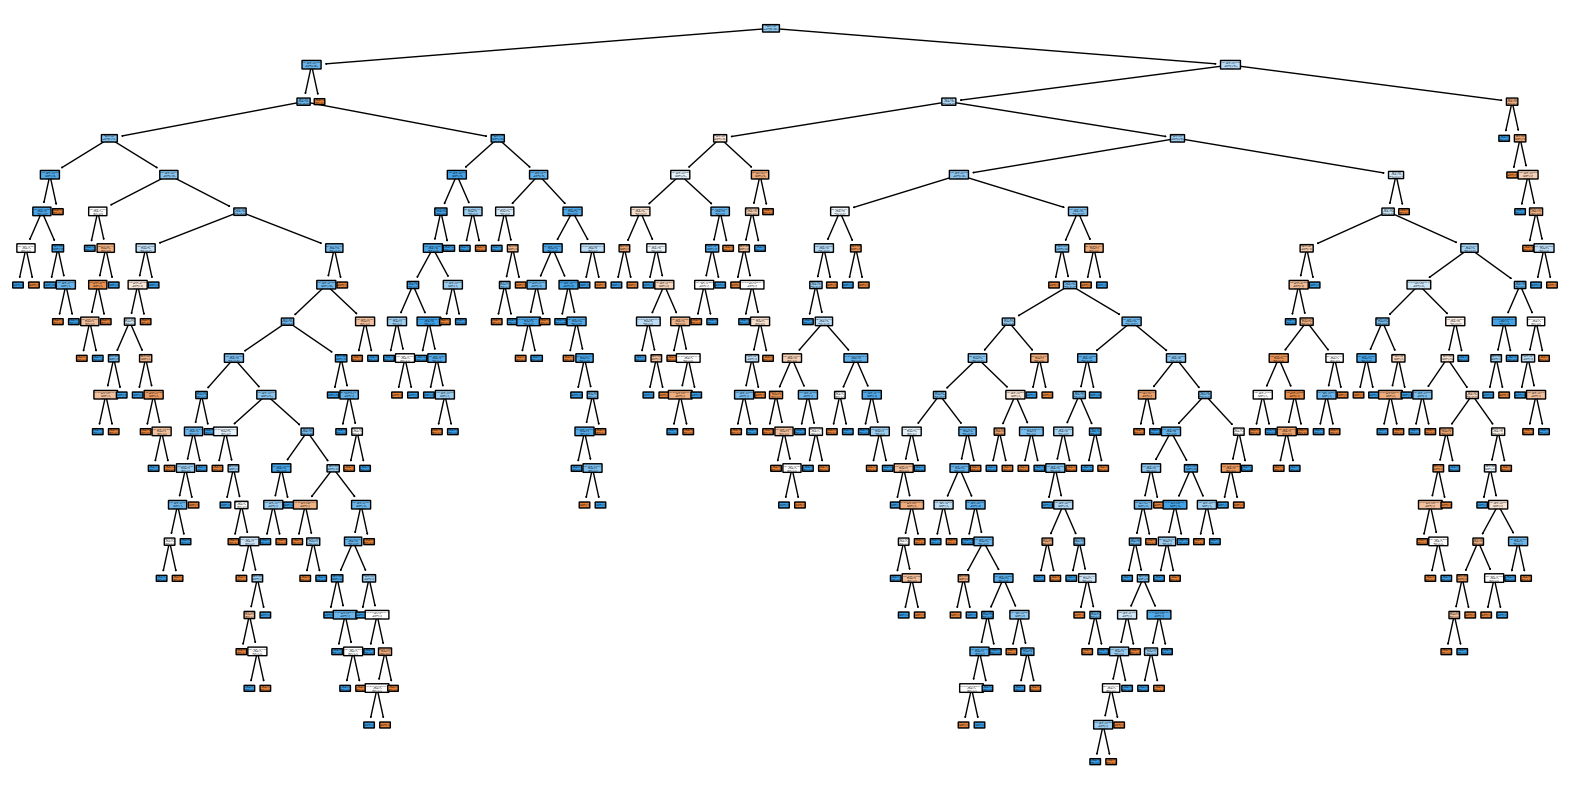

In [5]:
# Visualizing the decision tree 
from sklearn.tree import plot_tree  # Importing the plot_tree function 
import matplotlib.pyplot as plt

# Names of features  
feature_names = ['duration', 'credit_amount', 'installment_commitment', 'age', 'existing_credits', 'num_dependents'] 

# Plotting the tree  
plt.figure(figsize=(20, 10))  
plot_tree(dt_model, feature_names=feature_names, class_names=['Good', 'Bad'], filled=True, rounded=True)  
plt.show()

In [6]:
# Example: Calculating and printing evaluation metrics 
y_pred = dt_model.predict(X_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted')) 
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted')) 
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted')) 

Accuracy: 0.645
Precision: 0.6543443197755962
Recall: 0.645
F1 Score: 0.6492996202039535


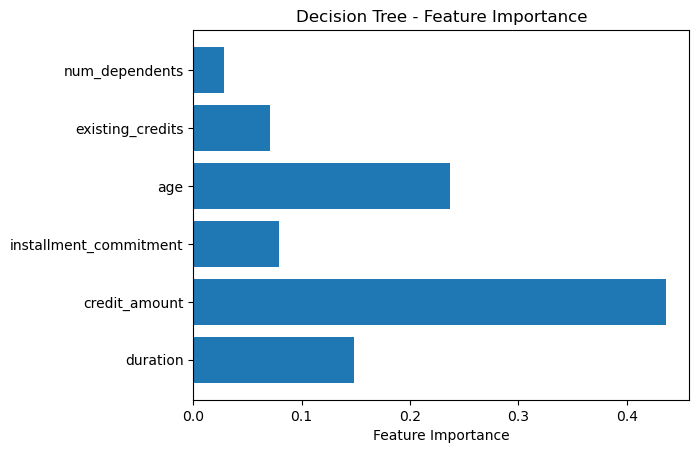

In [7]:
# Create a bar plot for feature importances 
feature_importances = dt_model.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, align="center") 
plt.yticks(range(len(feature_importances)), feature_names) 
plt.xlabel("Feature Importance") 
plt.title("Decision Tree - Feature Importance") 
plt.show()